<a href="https://colab.research.google.com/github/Nithish1010/Youtube_Transcript_Summarizer/blob/main/YTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.7 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video="https://www.youtube.com/watch?v=WDCGLmpRxtI"

In [ ]:
video_id=youtube_video.split("=")[1]

In [ ]:
video_id

'WDCGLmpRxtI'

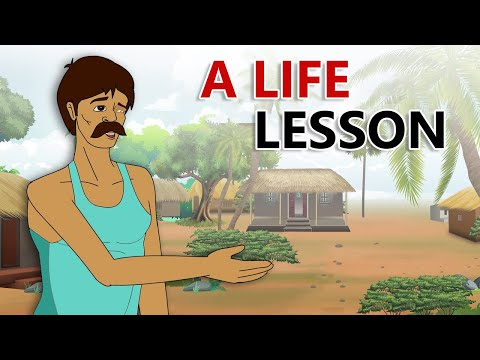

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript=YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': 'foreign', 'start': 1.02, 'duration': 2.419},
 {'text': 'there was a village named srirangpur in',
  'start': 6.919,
  'duration': 5.741},
 {'text': 'that there was a poor laborer named he',
  'start': 9.96,
  'duration': 5.04},
 {'text': 'used to live there with his family his',
  'start': 12.66,
  'duration': 4.379},
 {'text': "wife's name was Sharda and his son's",
  'start': 15.0,
  'duration': 4.38}]

In [ ]:
result=""
for i in transcript:
    result += '' +i['text']
print(len(result))

13945


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters=int(len(result)/1000)
summarized_text=[]
for i in range(0,num_iters+1):
  start=0
  start=i*1000
  end=(i+1)*1000
  out=summarizer(result[start:end])
  out=out[0]
  out=out['summary_text']
  summarized_text.append(out)

In [ ]:
print(summarized_text)

[" Raju has a sense of contempt about his father . Ignat was missing one eye and looked somewhatdeformed seeing that the other childrendid not allow Raju to come to them . Raju's father was a poor laborer named he used to live there with his family hiswife's name was Sharda .", ' Raju slept after takinghis dinner . ignath came home and he putsa rupee in the piggy bank like every day . He puts a rupee each day in the bank . Raju: "I am not making this money forme this is for our son he should studywell and become a doctor then he will dooperation of my eye"', " Raju's son Stephen forgets the Tiffin and runs to school in Harioh . Raju comes out to take the defendhow many times have I told you not to come near my school if they know thatI'm your son they'll hit  Raju. thing he is asmall child what does he know now .", " Raju snatches the Tiffin and goes back inside after seeing her that I don't go to him . me too nevercome near my school again I'll be hungrybut I won't eat if you bring an

In [ ]:
len(str(summarized_text))

4082

In [ ]:
str(summarized_text)

'[" Raju has a sense of contempt about his father . Ignat was missing one eye and looked somewhatdeformed seeing that the other childrendid not allow Raju to come to them . Raju\'s father was a poor laborer named he used to live there with his family hiswife\'s name was Sharda .", \' Raju slept after takinghis dinner . ignath came home and he putsa rupee in the piggy bank like every day . He puts a rupee each day in the bank . Raju: "I am not making this money forme this is for our son he should studywell and become a doctor then he will dooperation of my eye"\', " Raju\'s son Stephen forgets the Tiffin and runs to school in Harioh . Raju comes out to take the defendhow many times have I told you not to come near my school if they know thatI\'m your son they\'ll hit  Raju. thing he is asmall child what does he know now .", " Raju snatches the Tiffin and goes back inside after seeing her that I don\'t go to him . me too nevercome near my school again I\'ll be hungrybut I won\'t eat if y